# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import datahandler

import matplotlib.pyplot
import matplotlib.lines


# Constants

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)


Enhancing dataset: 100%|██████████| 2/2 [02:23<00:00, 71.83s/it] 


# Methods

In [5]:
def plot_stages():
    dataframe = data_preprocessor.load_processed_incidents_dataframe()

    initial_count = dataframe.shape[0]

    stages = ["Initial"]
    counts = [initial_count]

    # record stages
    dataframe = data_preprocessor._remove_duplicates(dataframe)
    stages.append("Remove\nduplicates")
    counts.append(dataframe.shape[0])

    dataframe = data_preprocessor._remove_incomplete_years(dataframe)
    stages.append("Remove\nincomplete\nyears")
    counts.append(dataframe.shape[0])

    dataframe = data_preprocessor._remove_outside_region(dataframe)
    stages.append("Remove\nincidents\noutside region")
    counts.append(dataframe.shape[0])

    dataframe = data_preprocessor._remove_other_resource_types(dataframe)
    dataframe = data_preprocessor._count_resources_sent(dataframe)
    stages.append("Remove other\nresource types")
    counts.append(dataframe.shape[0])

    dataframe = data_preprocessor._remove_extra_resources(dataframe)
    stages.append("Remove rows\ncounting aiding\nresources to\nan incident")
    counts.append(dataframe.shape[0])

    dataframe = data_preprocessor._remove_other_triage_impressions(dataframe)
    stages.append("Remove V2\nand V triage\nimpressions")
    counts.append(dataframe.shape[0])

    dataframe = data_preprocessor._remove_wrong_timestamps(dataframe)
    dataframe = data_preprocessor._fix_timestamps(dataframe)
    stages.append("Remove non-\nsequential\ntimestamps")
    counts.append(dataframe.shape[0])

    dataframe = data_preprocessor._remove_na(dataframe)
    stages.append("Remove NaN\nvalues")
    counts.append(dataframe.shape[0])

    dataframe = data_preprocessor._remove_outliers(dataframe)
    stages.append("Remove\noutliers")
    counts.append(dataframe.shape[0])

    # plot
    _, ax = matplotlib.pyplot.subplots(figsize=(18, 6))

    ax.bar(stages, counts, color="tab:blue")


    for i, count in enumerate(counts):
        percentage = round((count / initial_count) * 100, 2)
        ax.text(i, count, f"{count} ({percentage}%)", ha="center", va="bottom")

    line_position = 6.5
    ax.axvline(x=line_position, color="red", linestyle="--", linewidth=2)
    custom_line = matplotlib.lines.Line2D([], [], color="red", linestyle="--", linewidth=2, label='Count total incidents per shift')
    ax.legend(handles=[custom_line])

    ax.set_xlabel("Stages")
    ax.set_ylabel("Total Incidents")
    matplotlib.pyplot.title("Dataset Reduction Across Stages")

    matplotlib.pyplot.gca().tick_params(axis="x", which="major", pad=5)

    matplotlib.pyplot.show()


# Main

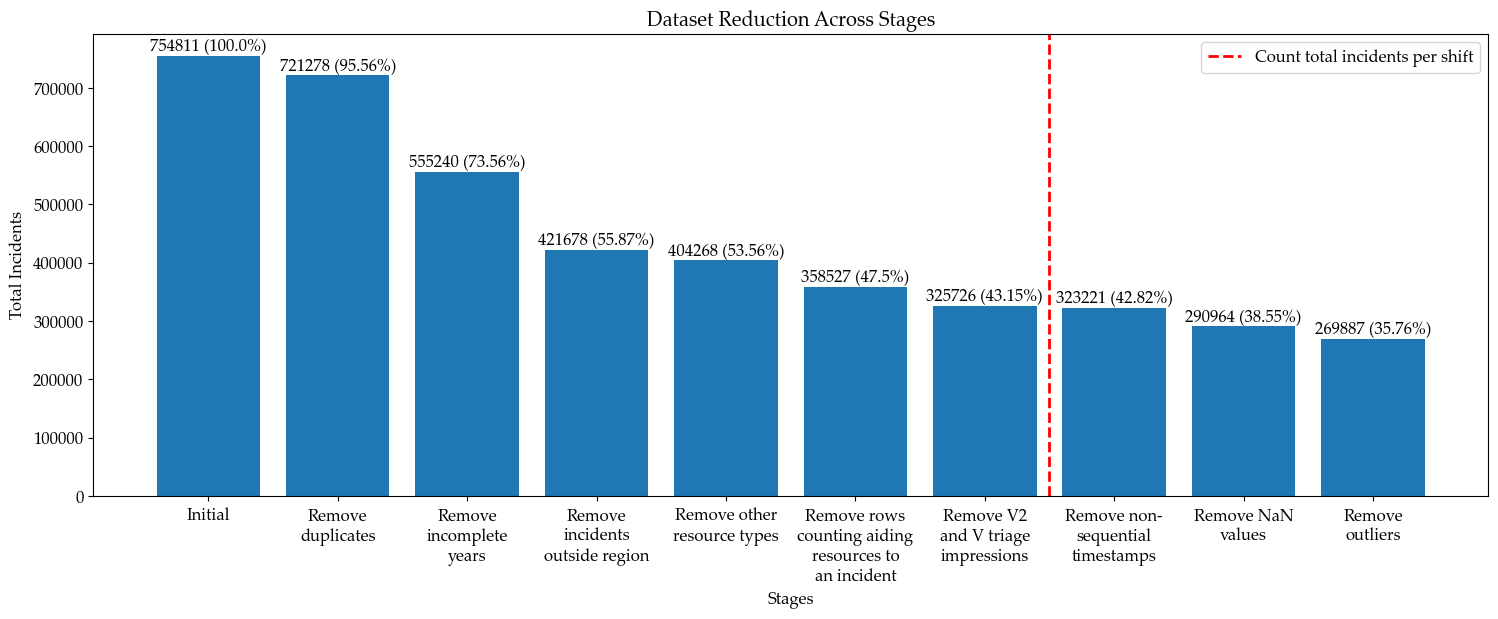

In [6]:
plot_stages()
